# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [37]:
from __future__ import print_function, division
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

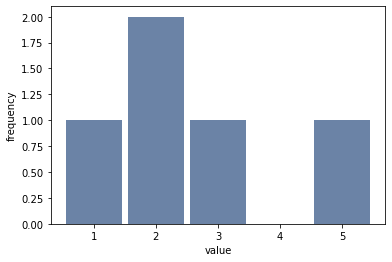

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

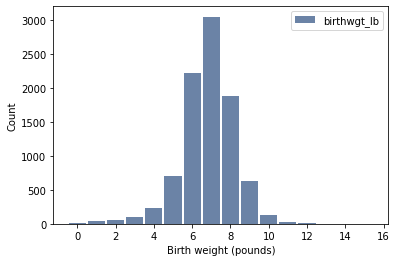

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

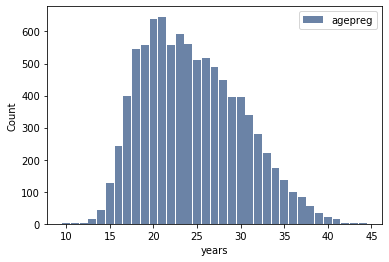

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

In [17]:
# Solution goes here

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [19]:
# Solution goes here

From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [20]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

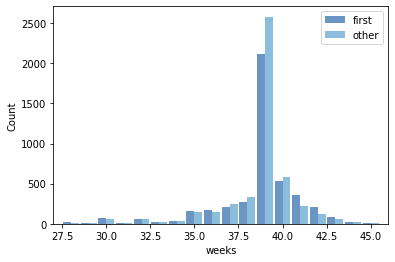

In [21]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [22]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [23]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [24]:
# Solution goes here

Here's are the mean pregnancy lengths for first babies and others:

In [25]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [32]:
birth_length_first_others = CohenEffectSize(firsts.prglngth,others.prglngth)
birth_length_first_others

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [36]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

mean_wgt_firsts = firsts.totalwgt_lb.mean()
mean_wgt_others = others.totalwgt_lb.mean()
print(f"The mean weight of first babies is", mean_wgt_firsts)
print(f"The mean weight of other babies is", mean_wgt_others)

The mean weight of first babies is 7.201094430437772
The mean weight of other babies is 7.325855614973262


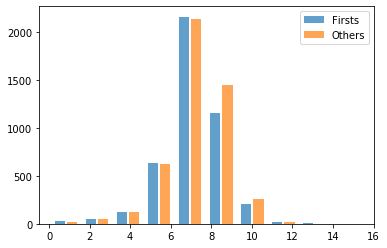

In [59]:
first_x = firsts.totalwgt_lb
other_x = others.totalwgt_lb

plt.hist((first_x, other_x), alpha=.7, width=.5, label=('Firsts', 'Others'))
plt.legend(loc=1)
plt.show()

In [62]:
#Cohen's effect difference in pregnancy lengths
birth_length_firsts_others = CohenEffectSize(firsts.prglngth,others.prglngth)
print("Cohen's effect for length of pregnency between firsts and others:", birth_length_firsts_others.round(3))

#Cohen's effect difference in total weight
birth_weight_firsts_others = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print("Cohen's effect for length of pregnency between firsts and others:", birth_weight_firsts_others.round(3))

Cohen's effect for length of pregnency between firsts and others: 0.029
Cohen's effect for length of pregnency between firsts and others: -0.089


For the next few exercises, we'll load the respondent file:

In [85]:
resp = nsfg.ReadFemResp()

In [86]:
resp.totincr.value_counts

<bound method IndexOpsMixin.value_counts of 0        9
1       10
2        5
3       13
4        6
        ..
7638    14
7639    14
7640    10
7641    13
7642    11
Name: totincr, Length: 7643, dtype: int64>

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

(array([ 299.,  301.,  266.,  421.,  445.,  559.,  583.,  606.,  607.,
         468.,  647.,  658.,  623., 1160.]),
 array([ 1.        ,  1.92857143,  2.85714286,  3.78571429,  4.71428571,
         5.64285714,  6.57142857,  7.5       ,  8.42857143,  9.35714286,
        10.28571429, 11.21428571, 12.14285714, 13.07142857, 14.        ]),
 <a list of 14 Patch objects>)

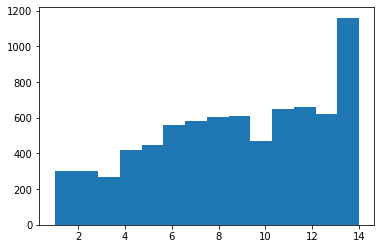

In [91]:
plt.hist(resp.totincr, bins=14)

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

(array([674., 734., 836., 796., 769., 843., 774., 793., 721., 703.]),
 array([15. , 17.9, 20.8, 23.7, 26.6, 29.5, 32.4, 35.3, 38.2, 41.1, 44. ]),
 <a list of 10 Patch objects>)

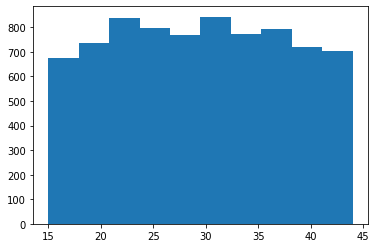

In [98]:
plt.hist(resp.age_r)

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

(array([ 942., 1716., 1826., 1740.,    0.,  906.,  313.,  118.,   78.,
           4.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

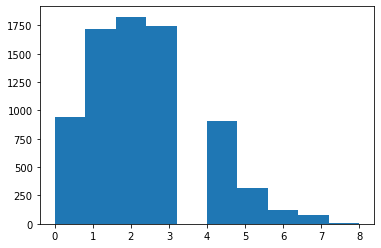

In [99]:
plt.hist(resp.numfmhh)

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

(array([6.352e+03, 1.137e+03, 1.240e+02, 2.300e+01, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

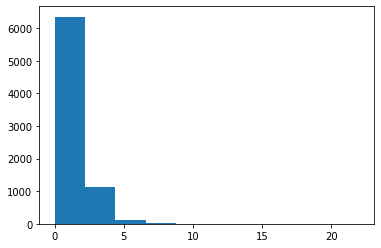

In [100]:
plt.hist(resp.parity)

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [36]:
# Solution goes here

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [37]:
# Solution goes here

Find the largest parities for high income respondents.

In [38]:
# Solution goes here

Compare the mean <tt>parity</tt> for high income respondents and others.

In [39]:
# Solution goes here

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [40]:
# Solution goes here